## Import Laibraries


In [55]:
# Data manipulation libraries
import pandas as pd  # For handling tabular data and data manipulation
import numpy as np  # For numerical operations and array handling

# Visualization libraries
import matplotlib.pyplot as plt  # For static plots and charts
import seaborn as sns  # For statistical visualizations, built on top of matplotlib
import plotly.express as px  # For creating interactive visualizations

# Data splitting and preprocessing
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For converting categorical data into numerical labels
from sklearn.preprocessing import StandardScaler  # For standardizing features by scaling

# Classification algorithms
from sklearn.tree import DecisionTreeClassifier  # For decision tree-based classification
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classification
from sklearn.ensemble import RandomForestClassifier  # For random forest-based classification
from xgboost import XGBClassifier  # For gradient boosting classification using XGBoost

# Model evaluation metrics
from sklearn.metrics import classification_report  # For generating a classification report (precision, recall, etc.)
from sklearn.metrics import confusion_matrix  # For calculating the confusion matrix
from sklearn.metrics import accuracy_score  # For calculating the accuracy of the model
from sklearn.metrics import RocCurveDisplay  # For displaying the ROC curve for binary classifiers


## Load Data

In [56]:
df=pd.read_csv(r"data\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# EDA 📍

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 32)

In [6]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,no,75166
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641


In [8]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Drop colunms not useful or Duplicated

In [57]:
df.drop(columns=['company','deposit_type','distribution_channel',
                 'babies','previous_bookings_not_canceled'],inplace=True)

df['agent'].fillna(df['agent'].mean(), inplace=True)

df.dropna(inplace =True)


## Missing Value 

<Axes: >

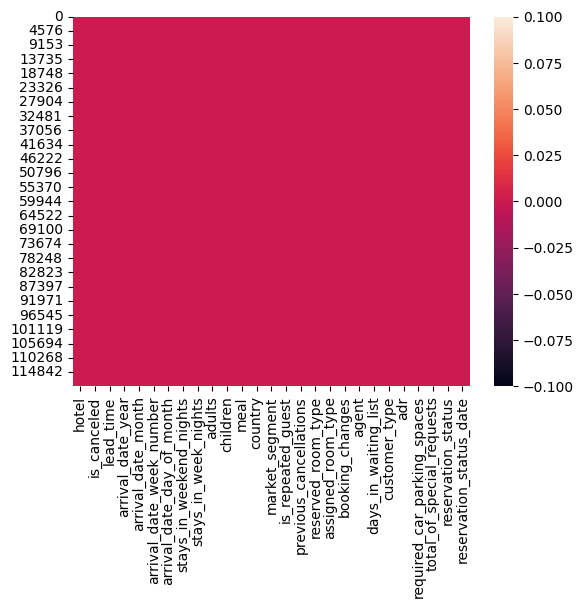

In [10]:
sns.heatmap(df.isnull()) 

### Duplicated Columns

In [58]:
df.duplicated().sum()

32042

In [12]:
# df.drop_duplicates(inplace=True)


# Preprocessing 🛠

In [13]:
df.dtypes

hotel                           object
is_canceled                     object
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
arrival_date_week_number         int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                       float64
meal                            object
country                         object
market_segment                  object
is_repeated_guest                int64
previous_cancellations           int64
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
agent                          float64
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status       

In [14]:
# month_to_number = {
#     'January': 1,
#     'February': 2,
#     'March': 3,
#     'April': 4,
#     'May': 5,
#     'June': 6,
#     'July': 7,
#     'August': 8,
#     'September': 9,
#     'October': 10,
#     'November': 11,
#     'December': 12
# }
# # df['arrival_date_month'] = df['arrival_date_month'].map(month_to_number)

In [59]:
df['children'] = df['children'].astype(int)
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

# Analysis & Visalizations📊

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   hotel                        118898 non-null  object        
 1   is_canceled                  118898 non-null  object        
 2   lead_time                    118898 non-null  int64         
 3   arrival_date_year            118898 non-null  int64         
 4   arrival_date_month           118898 non-null  object        
 5   arrival_date_week_number     118898 non-null  int64         
 6   arrival_date_day_of_month    118898 non-null  int64         
 7   stays_in_weekend_nights      118898 non-null  int64         
 8   stays_in_week_nights         118898 non-null  int64         
 9   adults                       118898 non-null  int64         
 10  children                     118898 non-null  int32         
 11  meal                         11

In [17]:
df['is_canceled'].value_counts()

is_canceled
no     74745
yes    44153
Name: count, dtype: int64

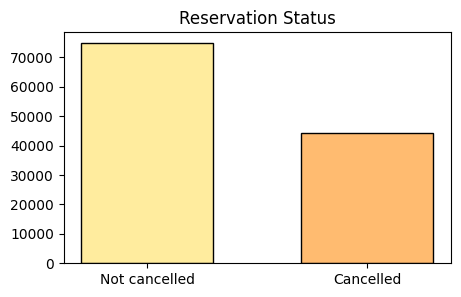

In [63]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])
plt.figure(figsize = (5,3))
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()

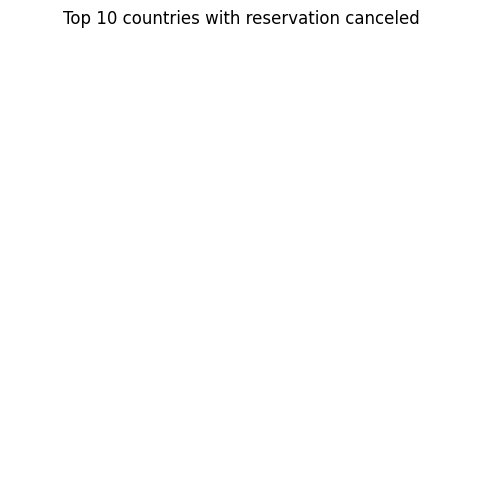

In [64]:
cancelled_data= df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
custom_colors = ['#FF6347', '#4682B4', '#7FFF00', '#FFD700', '#87CEEB', '#FFA07A', '#6A5ACD', '#FF69B4', '#40E0D0', '#DAA520']

plt.figure(figsize=(6, 6))  # Set background color to a light brown
plt.title('Top 10 countries with reservation canceled', color="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index, colors=custom_colors)
plt.show()

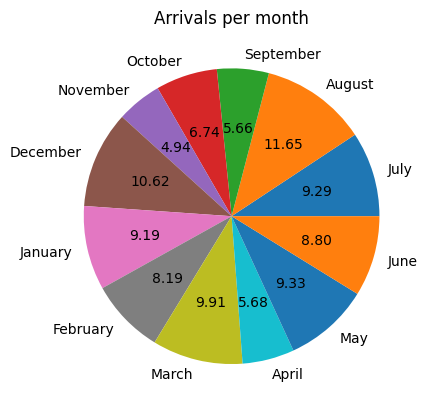

In [65]:
plt.pie(df.groupby(by=["arrival_date_month"]).size(), labels = df["arrival_date_month"].unique(), autopct = "%0.2f")
plt.title('Arrivals per month')
plt.show()

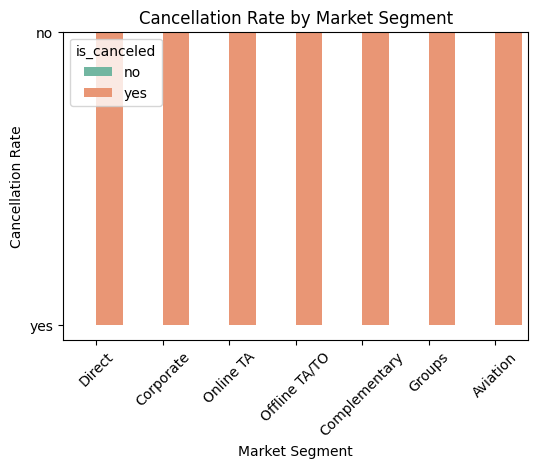

In [66]:
plt.figure(figsize=(6, 4))  
sns.barplot(x='market_segment', y='is_canceled', hue= 'is_canceled',data=df, palette='Set2')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)  
plt.show()

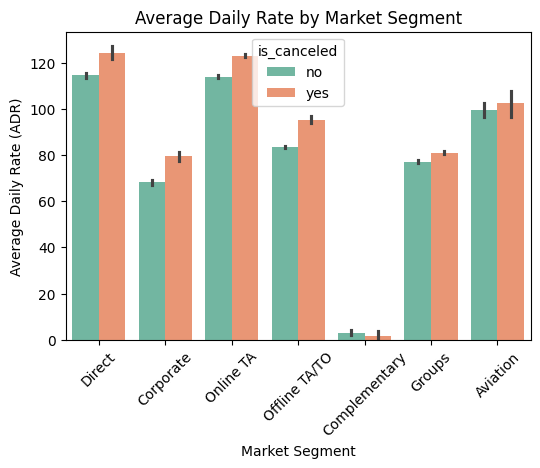

In [67]:
plt.figure(figsize=(6,4)) 
sns.barplot(x='market_segment', y='adr', hue= 'is_canceled',data=df, palette='Set2')
plt.title('Average Daily Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

- the Online TA is Canceled because ADR is height

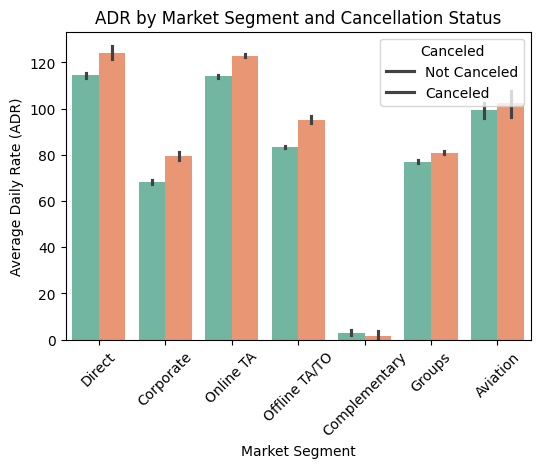

In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(x='market_segment', y='adr', hue='is_canceled', data=df, palette='Set2')
plt.title('ADR by Market Segment and Cancellation Status')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45) 
plt.legend(title='Canceled', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

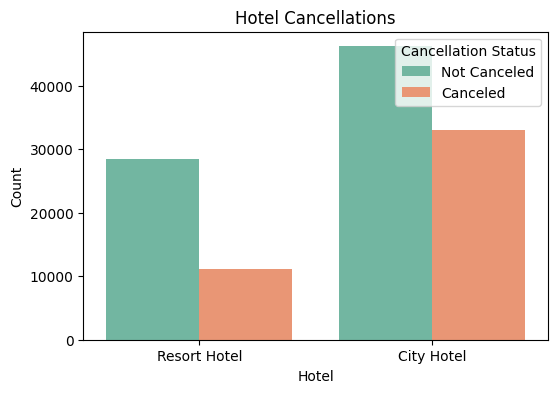

In [69]:
plt.figure(figsize=(6, 4))  

# Create the bar plot
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Set2')

plt.title('Hotel Cancellations')
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

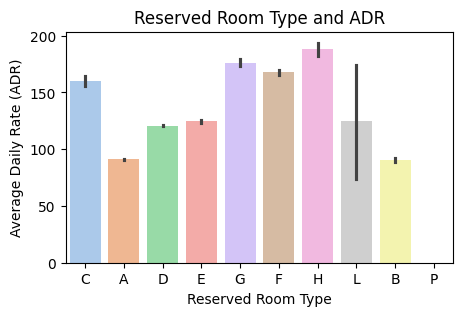

In [70]:
plt.figure(figsize=(5,3))
sns.barplot(x='reserved_room_type', y='adr', hue='reserved_room_type', data=df, palette='pastel')
plt.title('Reserved Room Type and ADR')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


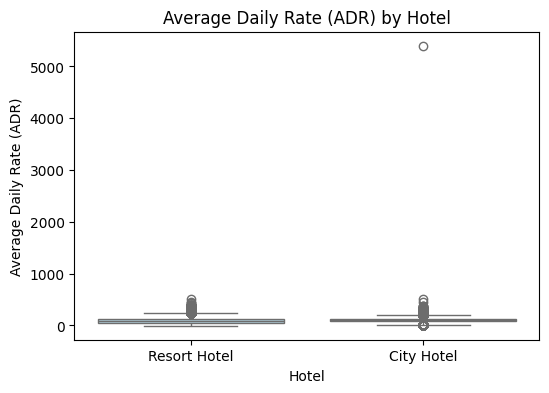

In [77]:
custom_palette = {'Resort Hotel': 'lightblue', 'City Hotel': 'salmon'}
plt.figure(figsize=(6, 4))  
sns.boxplot(x='hotel', y='adr',hue='hotel', data=df, palette=custom_palette)
plt.title('Average Daily Rate (ADR) by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


In [72]:
df[df['hotel']=='City Hotel']['adr'].max()

5400.0

In [78]:
df[df['adr']==df['adr'].max()] # is outlier because not reason for the height adr 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,yes,35,2016,March,13,25,0,1,2,...,A,1,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


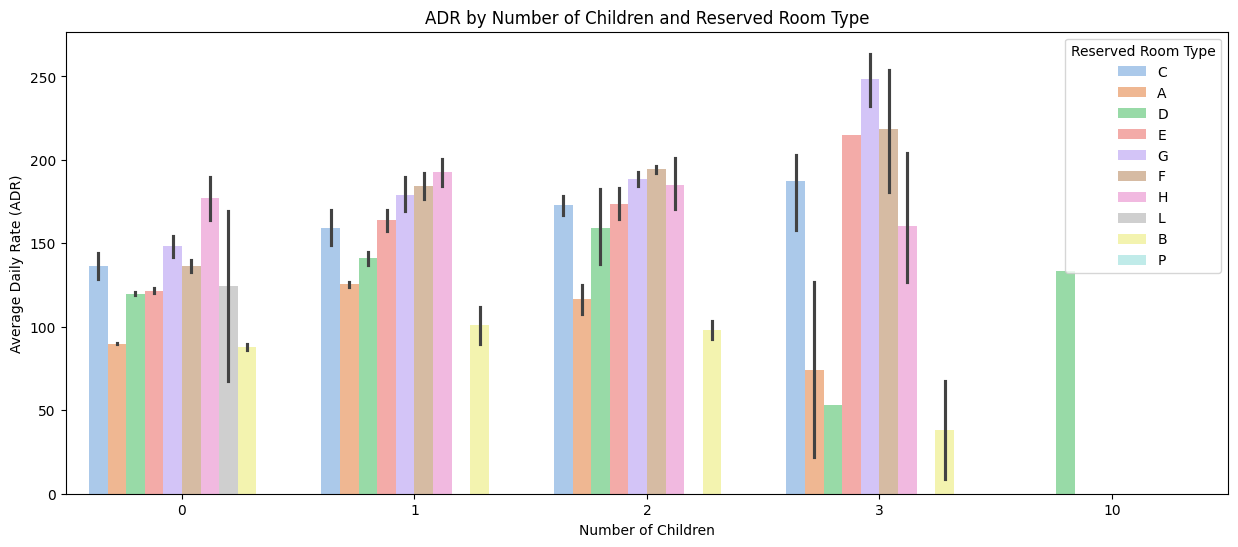

In [79]:
plt.figure(figsize=(15, 6)) 
sns.barplot(x='children', y='adr', hue='reserved_room_type', data=df, palette='pastel')
plt.title('ADR by Number of Children and Reserved Room Type')
plt.xlabel('Number of Children')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Reserved Room Type', loc='upper right')
plt.show()

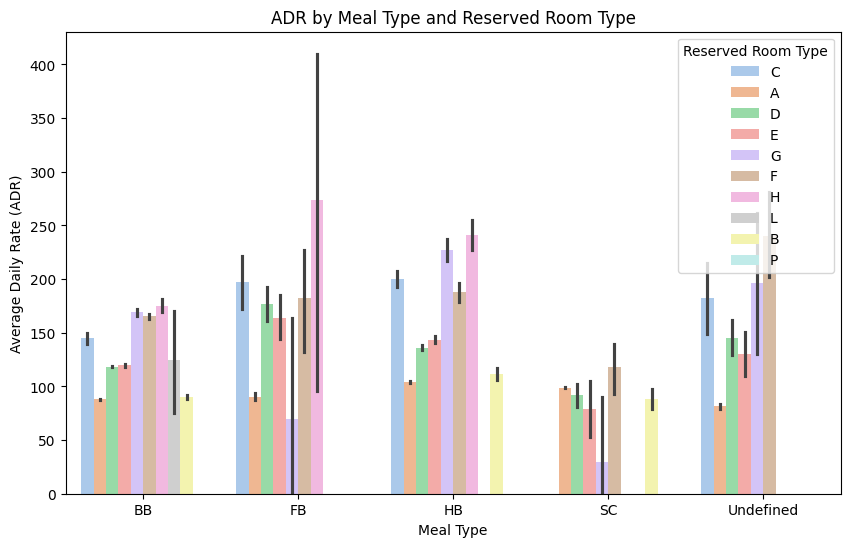

In [80]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='meal', y='adr', hue='reserved_room_type', data=df, palette='pastel')
plt.title('ADR by Meal Type and Reserved Room Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Reserved Room Type', loc='upper right')
plt.show()

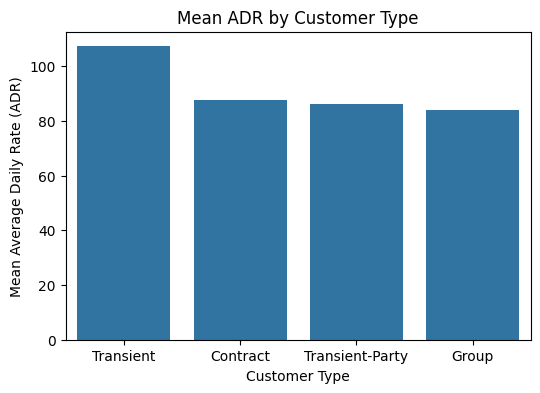

In [81]:
plt.figure(figsize=(6, 4))
sns.barplot(x='customer_type', y='adr', data=df, errorbar=None)
plt.title('Mean ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Mean Average Daily Rate (ADR)')
plt.show()


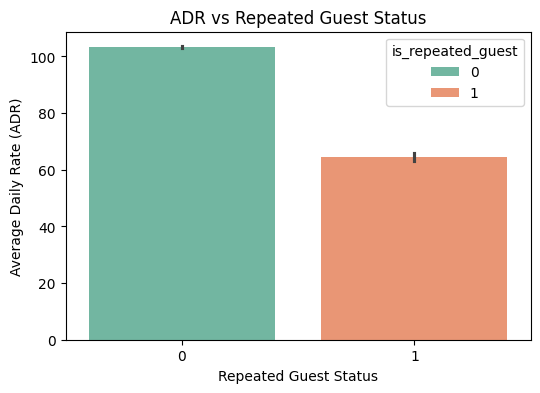

In [83]:
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])
plt.figure(figsize=(6, 4))
sns.barplot(x='is_repeated_guest', y='adr',hue='is_repeated_guest', data=df, palette='Set2',)
plt.title('ADR vs Repeated Guest Status')
plt.xlabel('Repeated Guest Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


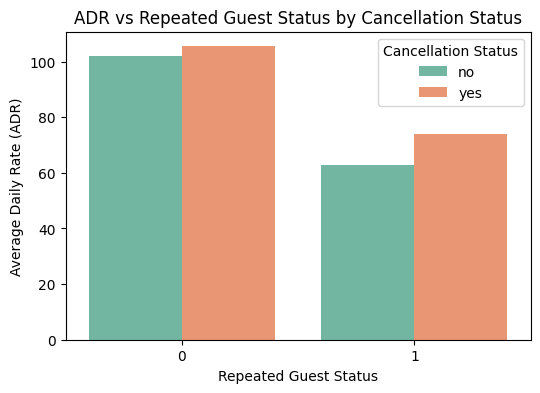

In [84]:
plt.figure(figsize=(6, 4))
sns.barplot(x='is_repeated_guest', y='adr', hue='is_canceled', data=df, palette='Set2',errorbar=None)
plt.title('ADR vs Repeated Guest Status by Cancellation Status')
plt.xlabel('Repeated Guest Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Cancellation Status', loc='upper right')
plt.show()


## BoxPlot for Target col

In [85]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal', 'country',
       'market_segment', 'is_repeated_guest', 'previous_cancellations',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


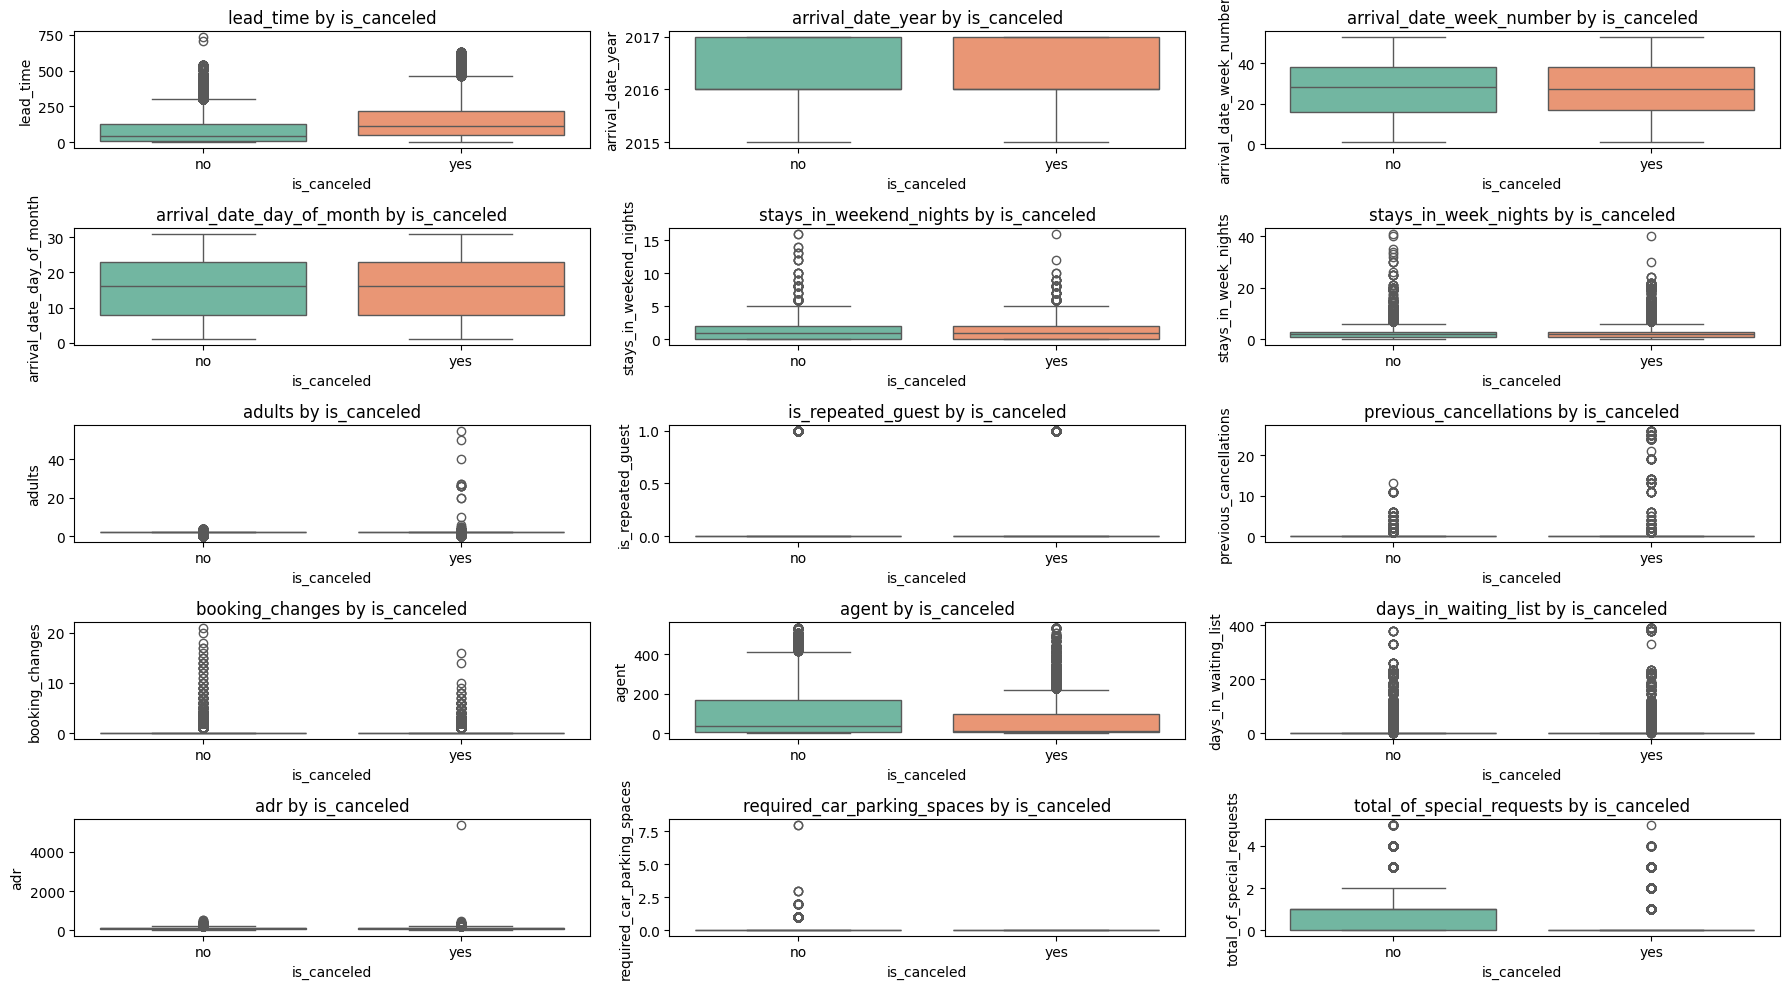

In [95]:
plt.figure(figsize=(18, 10))
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_canceled'], errors='ignore').columns

num_columns = len(numerical_columns)
n_rows = (num_columns + 2) // 3  

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(x='is_canceled', y=column,hue='is_canceled', data=df, palette='Set2')
    plt.title(f'{column} by is_canceled')
    plt.xlabel('is_canceled')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Distribution of Cols by Target Col

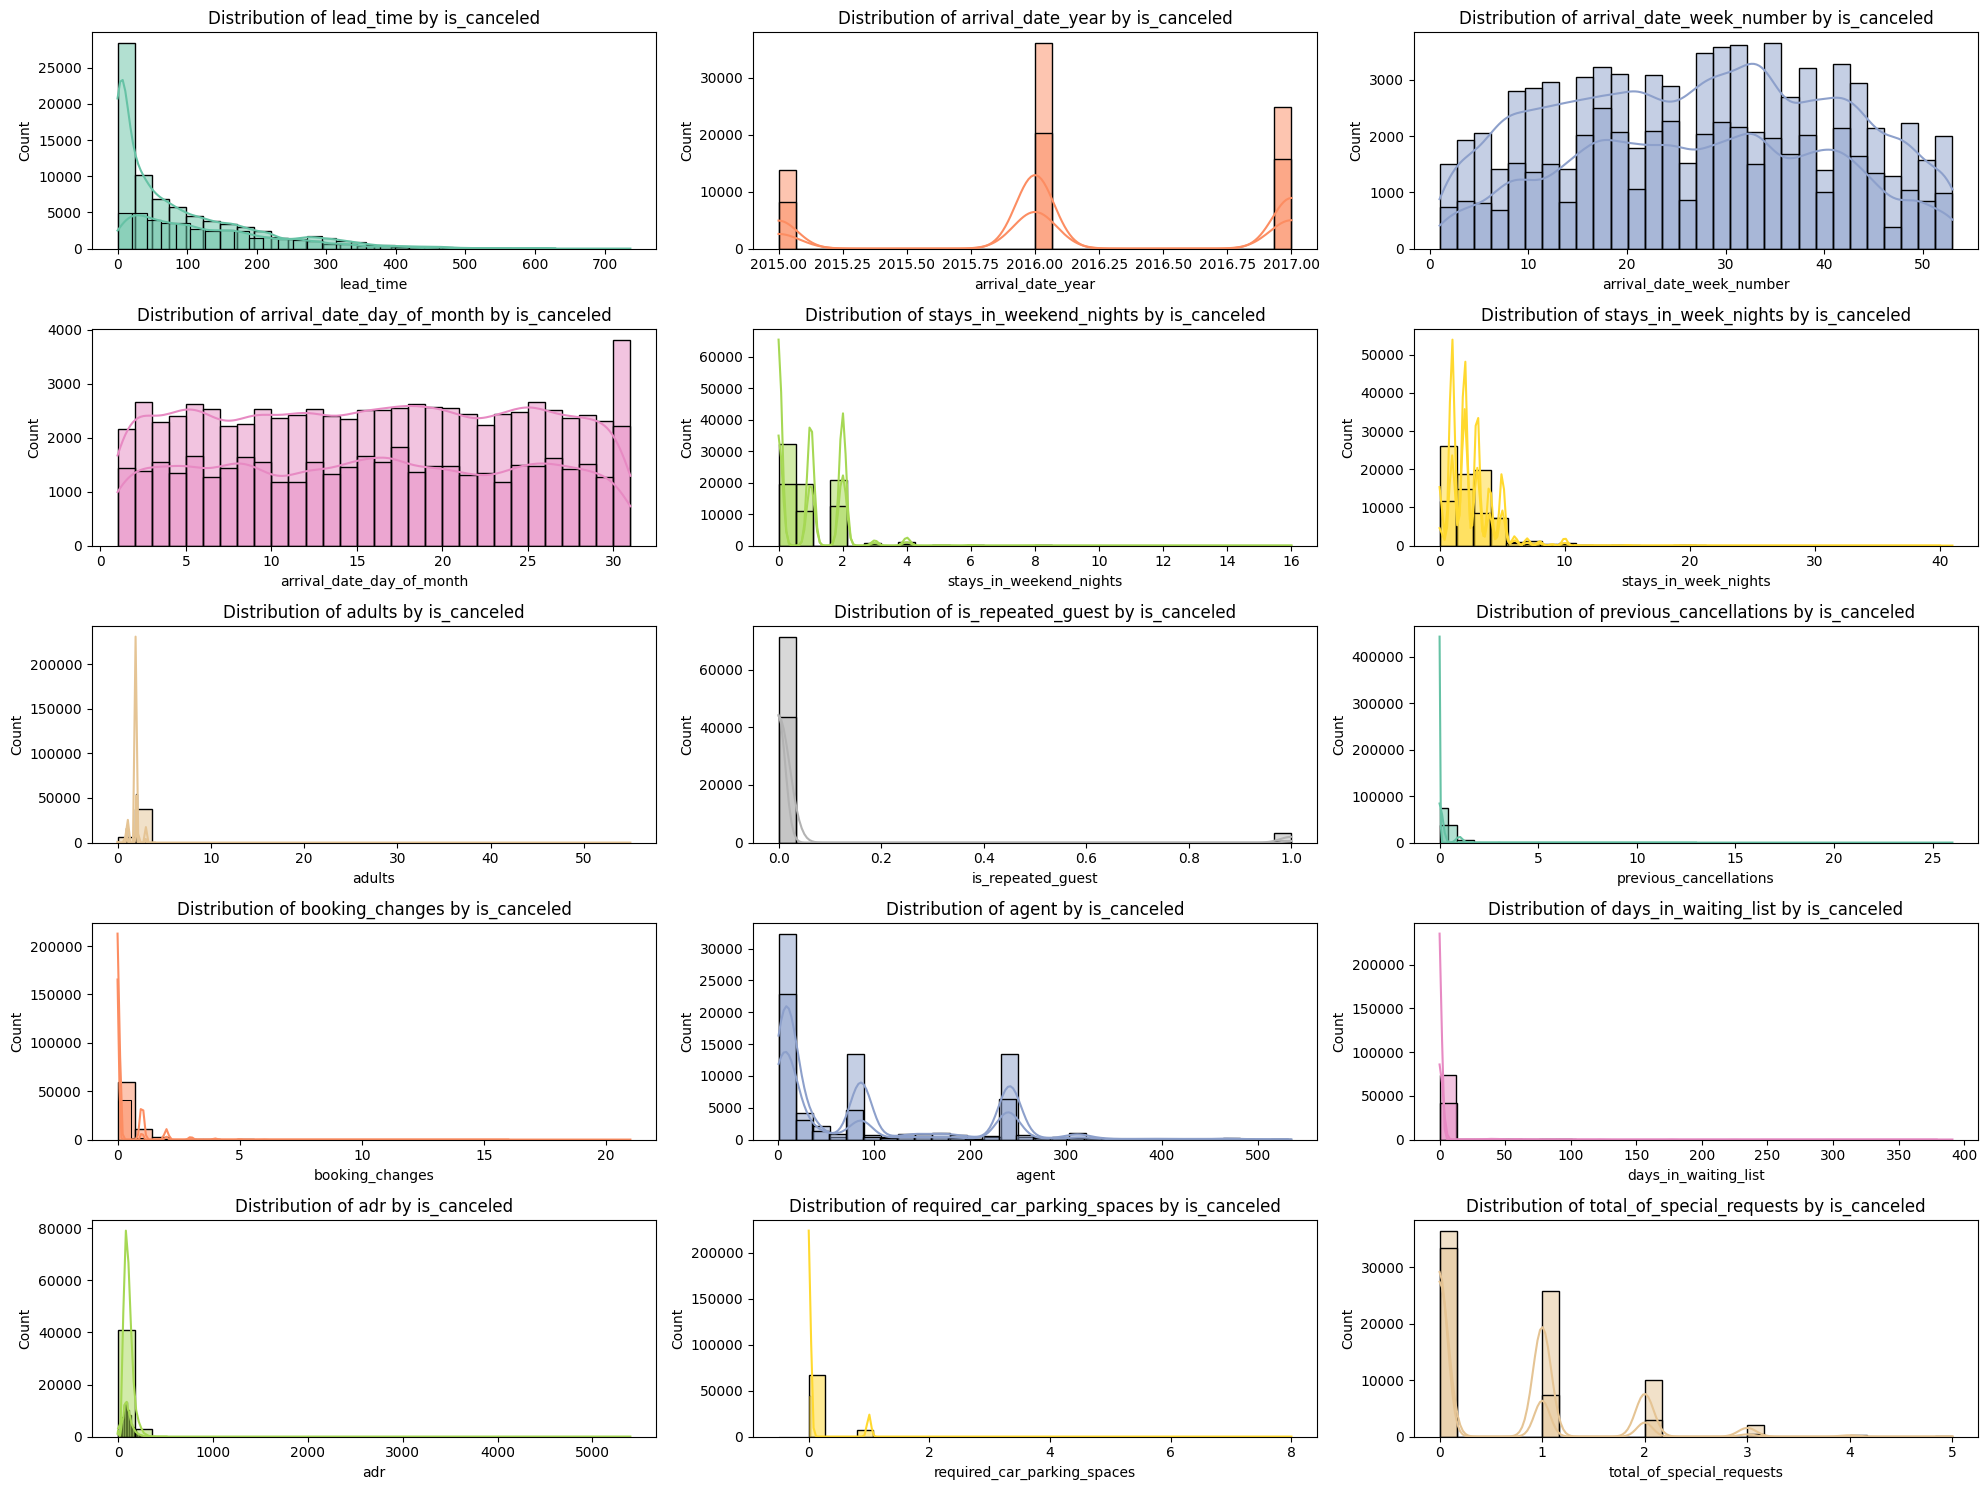

In [109]:
plt.figure(figsize=(20, 15))
num_columns = len(numerical_columns)
n_cols = 3  # number of columns in each row
n_rows = (num_columns + n_cols - 1) // n_cols

colors = sns.color_palette('Set2', n_colors=num_columns)

for i, col in enumerate(numerical_columns, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[df['is_canceled'] == 0][col], kde=True, bins=30, color=colors[i-1], label='Not Canceled', ax=ax)
    sns.histplot(df[df['is_canceled'] == 1][col], kde=True, bins=30, color=colors[i-1], label='Canceled', alpha=0.5, ax=ax)
    ax.set_title(f'Distribution of {col} by is_canceled')
    #ax.legend()  # Apply legend directly to the axis

plt.tight_layout()
plt.show()

## the average daily rate over time for canceled and not bookings from 2016 to September 2017.


In [97]:
cancelled_data= df[df['is_canceled']==1]
cancelled_data_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True) # for fig 
cancelled_data_adr.sort_values('reservation_status_date', inplace=True) # for fig 
 
not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)


KeyError: 'reservation_status_date'

In [98]:
cancelled_df_adr = cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016') &
                                      (cancelled_data_adr['reservation_status_date']<'2017-09')]

not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') &
                                            (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

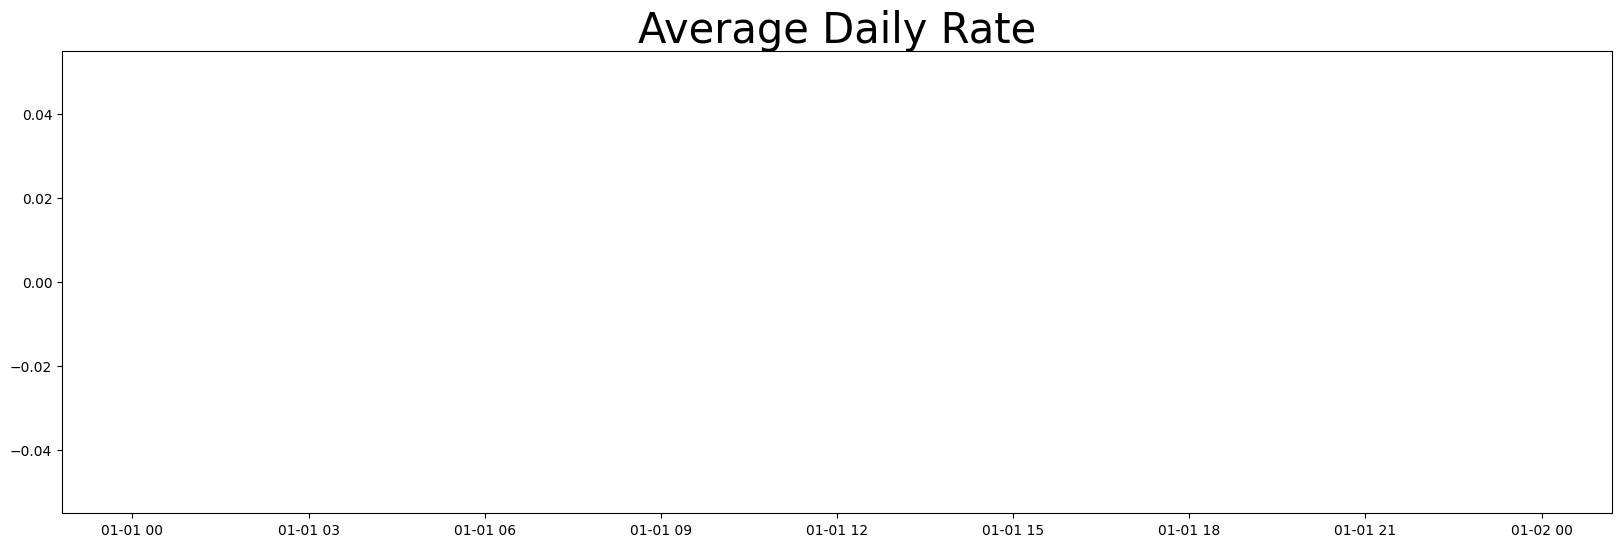

In [112]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
#plt.legend(fontsize = 15)
plt.show()

In [100]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    74745
Canceled     42950
No-Show       1203
Name: count, dtype: int64

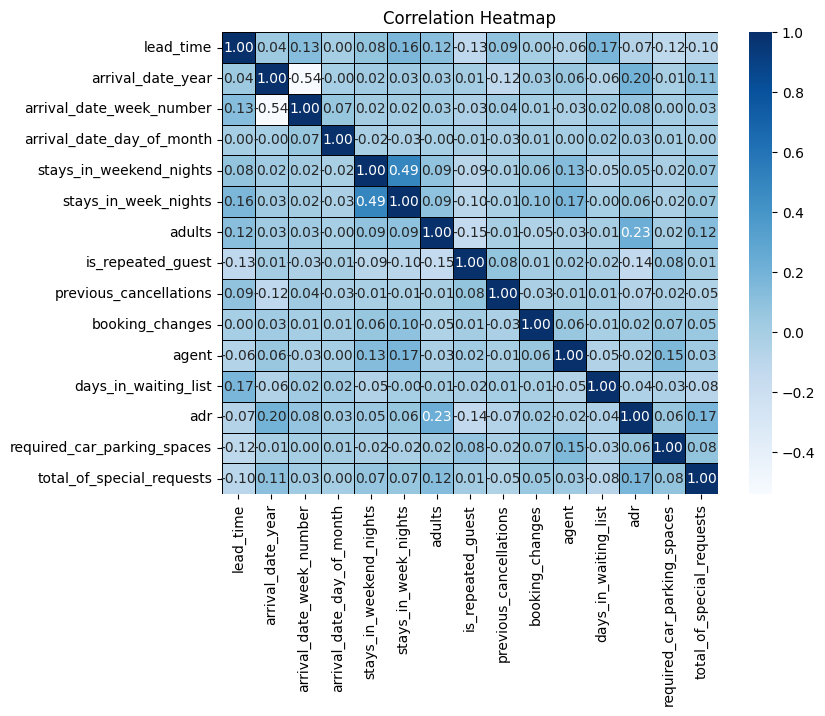

In [114]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,cmap='Blues', linecolor='black',fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Predictive Modeling

## Data Preparation


In [102]:
df.drop(['reservation_status_date'], axis=1, inplace=True)

- Label Encoder

In [103]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object', 'category']):
    df[column] = label_encoder.fit_transform(df[column])

In [45]:
X = df.drop(columns=['is_canceled'], axis=1)
y = df['is_canceled']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)


## Decision Tree

In [104]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict using the trained decision tree model
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Evaluate accuracy
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Decision Tree Training Accuracy: {accuracy_train_dt:.2f}")
print(f"Decision Tree Test Accuracy: {accuracy_test_dt:.2f}")
print(classification_report(y_test, y_pred_test_dt))


Decision Tree Training Accuracy: 1.00
Decision Tree Test Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14949
           1       1.00      1.00      1.00      8831

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780



[Text(0.4, 0.8333333333333334, 'x[24] <= 0.5\ngini = 0.467\nsamples = 95118\nvalue = [59796, 35322]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34354\nvalue = [0, 34354]'),
 Text(0.6, 0.5, 'x[24] <= 1.5\ngini = 0.031\nsamples = 60764\nvalue = [59796, 968]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 59796\nvalue = [59796, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 968\nvalue = [0, 968]')]

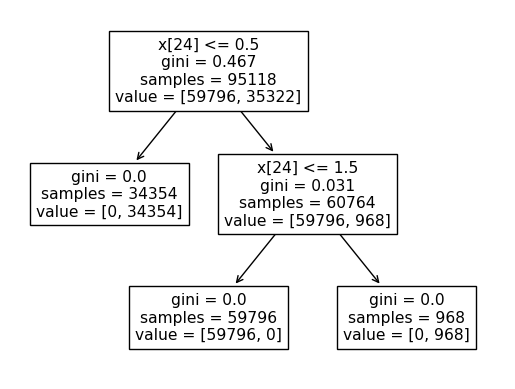

In [105]:
from sklearn.tree import plot_tree
plot_tree(dt_model)

## KNN 

In [106]:
knn_model = KNeighborsClassifier(n_neighbors=10)  
knn_model.fit(X_train, y_train)

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

print(f"KNN Training Accuracy: {accuracy_train_knn:.2f}")
print(f"KNN Test Accuracy: {accuracy_test_knn:.2f}")
print(classification_report(y_test, y_pred_test_knn))


KNN Training Accuracy: 0.84
KNN Test Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     14949
           1       0.79      0.62      0.70      8831

    accuracy                           0.80     23780
   macro avg       0.80      0.76      0.77     23780
weighted avg       0.80      0.80      0.79     23780



## Random Forest

In [107]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")

print(classification_report(y_test, y_pred_test))


Training Accuracy: 1.00
Test Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14949
           1       1.00      1.00      1.00      8831

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780



## XGB 

In [108]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(f"XGBoost Training Accuracy: {accuracy_train_xgb:.2f}")
print(f"XGBoost Test Accuracy: {accuracy_test_xgb:.2f}")
print(classification_report(y_test, y_pred_test_xgb))


XGBoost Training Accuracy: 1.00
XGBoost Test Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14949
           1       1.00      1.00      1.00      8831

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780

